# **Segmentasi Pelanggan Grosir Menggunakan Data Wholesale Customers**

## **Pendahuluan**

Dalam dunia bisnis grosir, pemahaman yang mendalam tentang perilaku pelanggan sangat penting untuk pengambilan keputusan strategis, seperti penentuan promosi, pengelompokan produk, dan pengelolaan hubungan pelanggan. Salah satu pendekatan yang efektif untuk memahami pelanggan secara lebih personal adalah dengan melakukan segmentasi pelanggan.

Segmentasi pelanggan memungkinkan perusahaan untuk membagi pelanggan ke dalam kelompok-kelompok berdasarkan kesamaan karakteristik, sehingga strategi pemasaran dan layanan dapat disesuaikan dengan kebutuhan masing-masing segmen. Dalam konteks grosir, segmentasi ini dapat dilakukan berdasarkan pola pengeluaran pelanggan terhadap berbagai kategori produk, seperti produk segar, susu, bahan makanan, makanan beku, kertas-deterjen, dan makanan ringan.

Dataset Wholesale Customers dari UCI Machine Learning Repository merupakan salah satu sumber data yang ideal untuk keperluan segmentasi tersebut. Dataset ini berisi data pengeluaran tahunan dari 440 pelanggan grosir terhadap beberapa kategori produk. Selain itu, data ini juga mencakup informasi wilayah (region) dan tipe pelanggan (channel), yang dapat membantu dalam menganalisis preferensi geografis dan tipe bisnis.

Dengan menerapkan teknik clustering seperti K-Means atau DBSCAN pada dataset ini, kita dapat mengidentifikasi kelompok-kelompok pelanggan dengan karakteristik pembelian yang serupa. Hasil segmentasi ini dapat digunakan oleh manajemen untuk:
- Merancang strategi pemasaran yang lebih efektif,
- Menentukan prioritas pelanggan dalam distribusi produk,
- Menyusun rekomendasi produk secara personalisasi.



# **Data Understanding**
## **Sumber Data**

Dataset diambil dari link berikut:

🔗 https://archive.ics.uci.edu/dataset/302/wholesale+customers

Dataset Wholesale Customers tersedia di UCI Machine Learning Repository, dan berasal dari sektor ritel dan grosir di Portugal. Data ini dikumpulkan oleh pemasok grosir untuk menganalisis pola pengeluaran dari berbagai jenis pelanggan di wilayah berbeda.

## **Tujuan**
Dataset ini bertujuan untuk digunakan dalam pengembangan sistem segmentasi pelanggan, khususnya dalam konteks analisis pengeluaran terhadap berbagai kategori produk. Dengan dataset ini, dapat dilakukan berbagai teknik data mining, seperti clustering (segmentasi), untuk:
- Mengidentifikasi pola pembelian pelanggan,
- Membedakan pelanggan berdasarkan kebutuhan dan volume pengeluaran
- Merancang strategi pemasaran dan distribusi produk yang lebih tepat sasaran.


## **Integrasi Data**
Untuk dapat mengolah data dari UCI Machine Learning Repository, diperlukan langkah integrasi agar dataset bisa dimuat ke dalam lingkungan Python secara langsung. Salah satu cara termudah dan modern adalah dengan menggunakan package Python bernama ucimlrepo, yang memungkinkan pengguna untuk mengakses dataset UCI tanpa harus mengunduh manual dalam bentuk .csv atau .data.
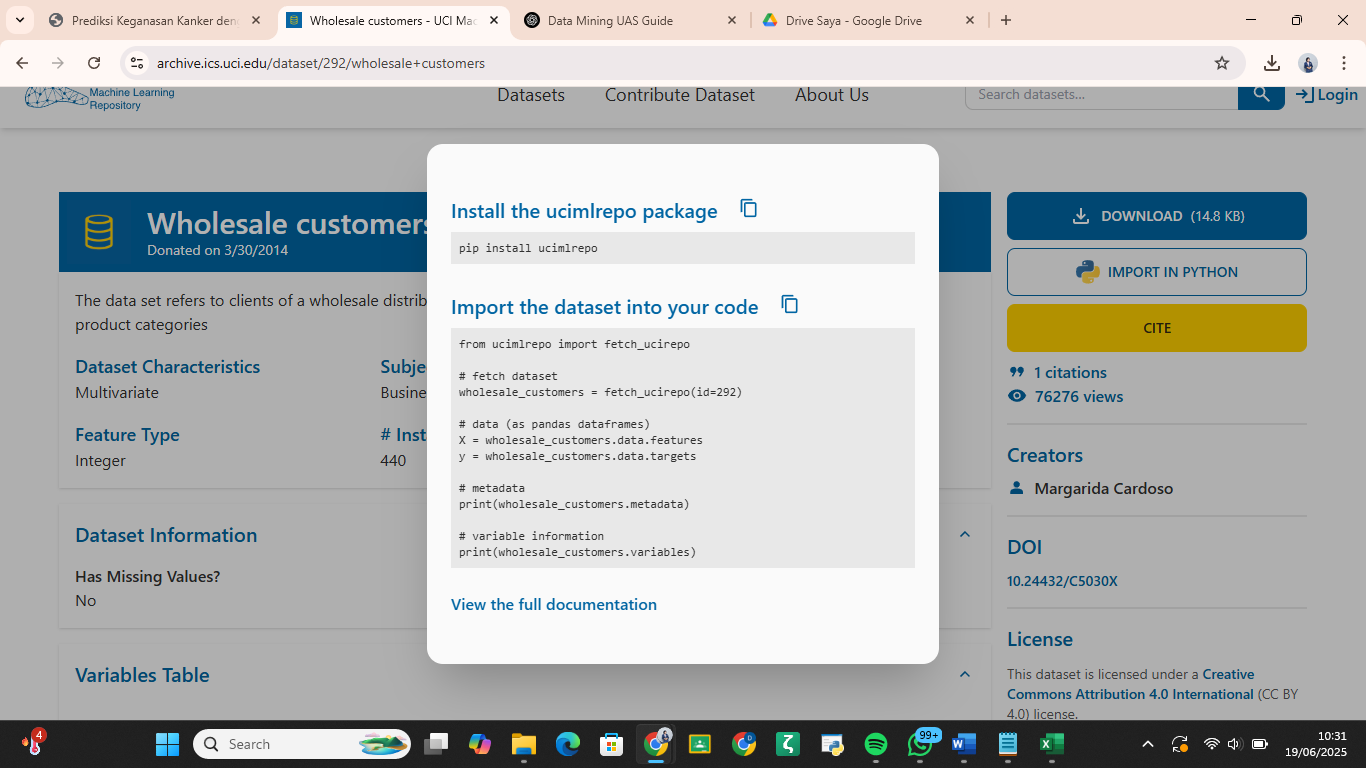

In [1]:
!pip install ucimlrepo


Berikut adalah kode Python lengkap untuk mengakses dataset Wholesale Customers dari UCI dan menampilkannya dalam bentuk DataFrame,

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Import library yang dibutuhkan
import pandas as pd

# URL langsung ke file CSV dataset Wholesale Customers di UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

# Daftar nama kolom (karena file aslinya tidak menyertakan header)
headers = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Membaca data dan memberi nama kolom
data = pd.read_csv(url, names=headers, header=0)

# Menyimpan data ke file CSV lokal
data.to_csv("wholesale_customers.csv", index=True)

# Menampilkan info struktur dataset
print(data.info())  # Untuk melihat tipe data, jumlah baris, null, dll

# Menampilkan 5 baris pertama
print(data.head())  # Untuk melihat isi awal dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4      

In [6]:
from IPython.display import display

# Menampilkan seluruh dataset (hanya beberapa baris pertama yang tampil default)
display(data)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


/tmp/ipython-input-7-4265572850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=data, palette='Set2')


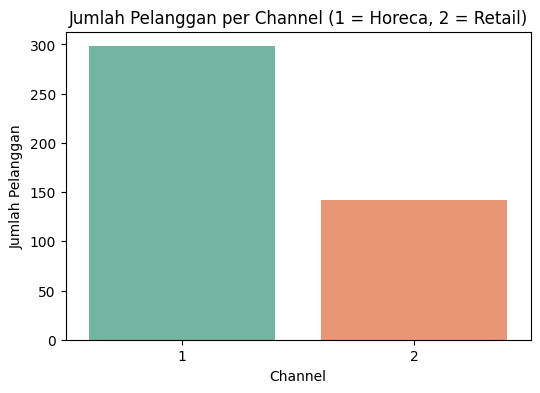

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Channel', data=data, palette='Set2')
plt.title('Jumlah Pelanggan per Channel (1 = Horeca, 2 = Retail)')
plt.xlabel('Channel')
plt.ylabel('Jumlah Pelanggan')
plt.show()


<Figure size 1200x1000 with 0 Axes>

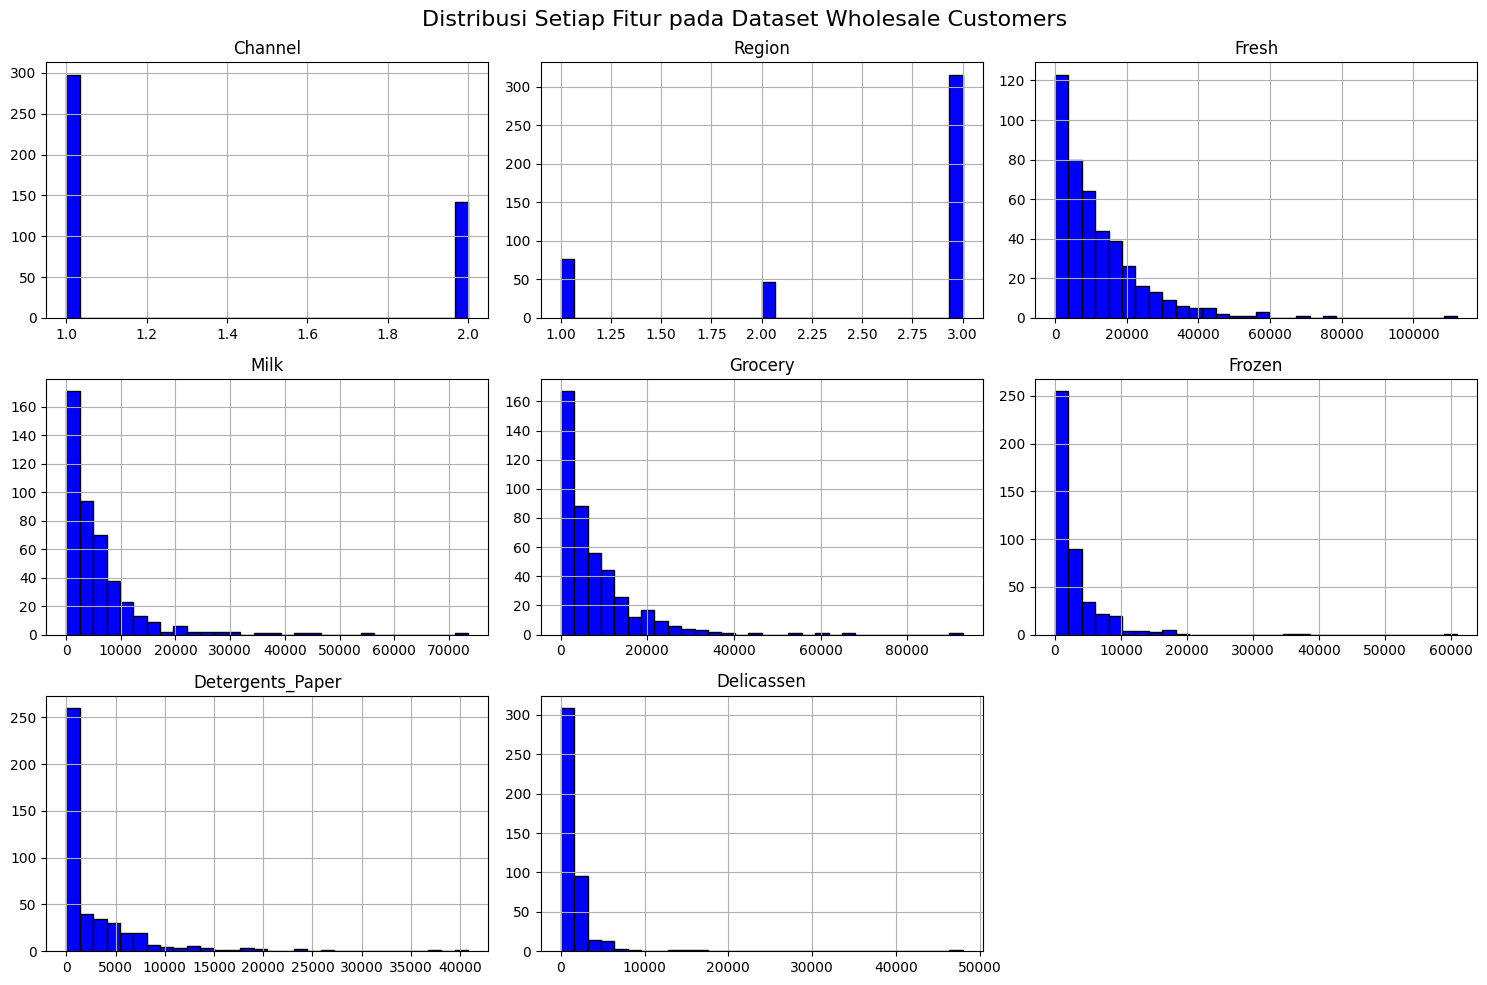

In [8]:
import matplotlib.pyplot as plt

# Buat figure dan histogram dari semua kolom numerik
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur pada Dataset Wholesale Customers', fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
print("Missing Values per Kolom:\n", data.isnull().sum())


Missing Values per Kolom:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [10]:
print(data.describe())


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

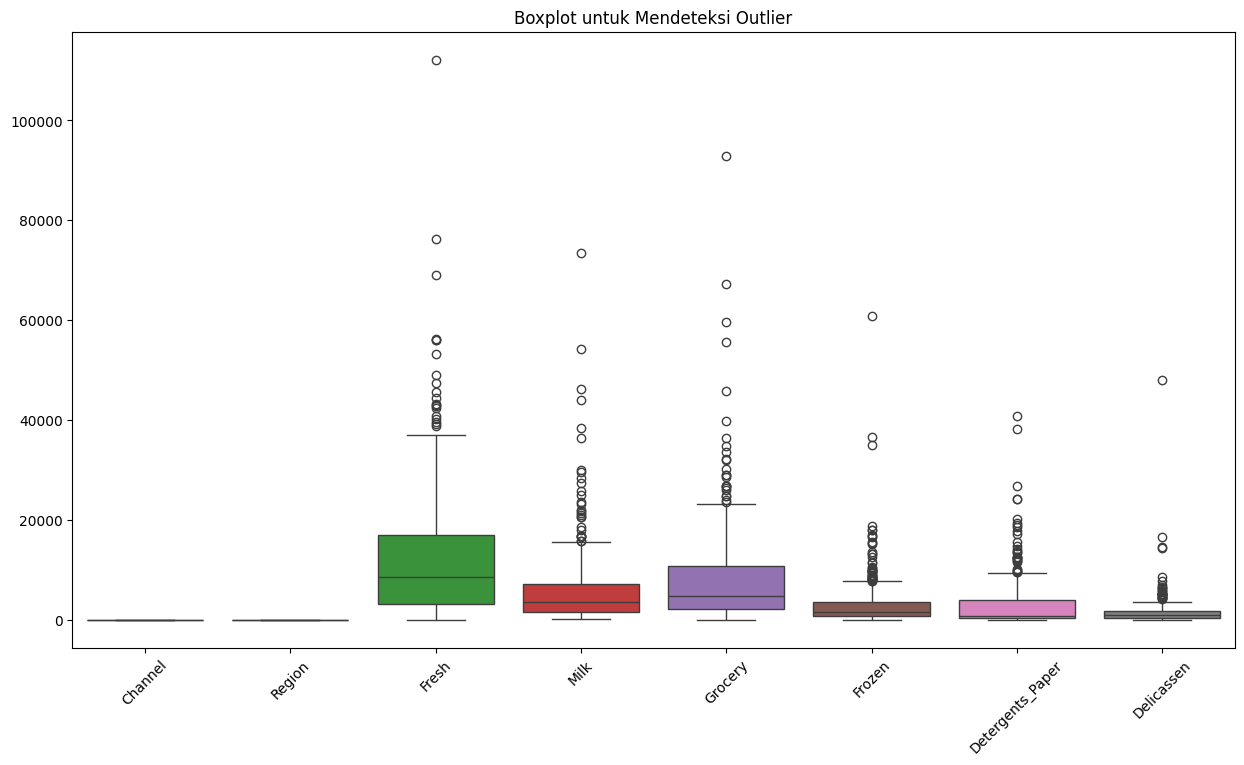

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=data)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.xticks(rotation=45)
plt.show()


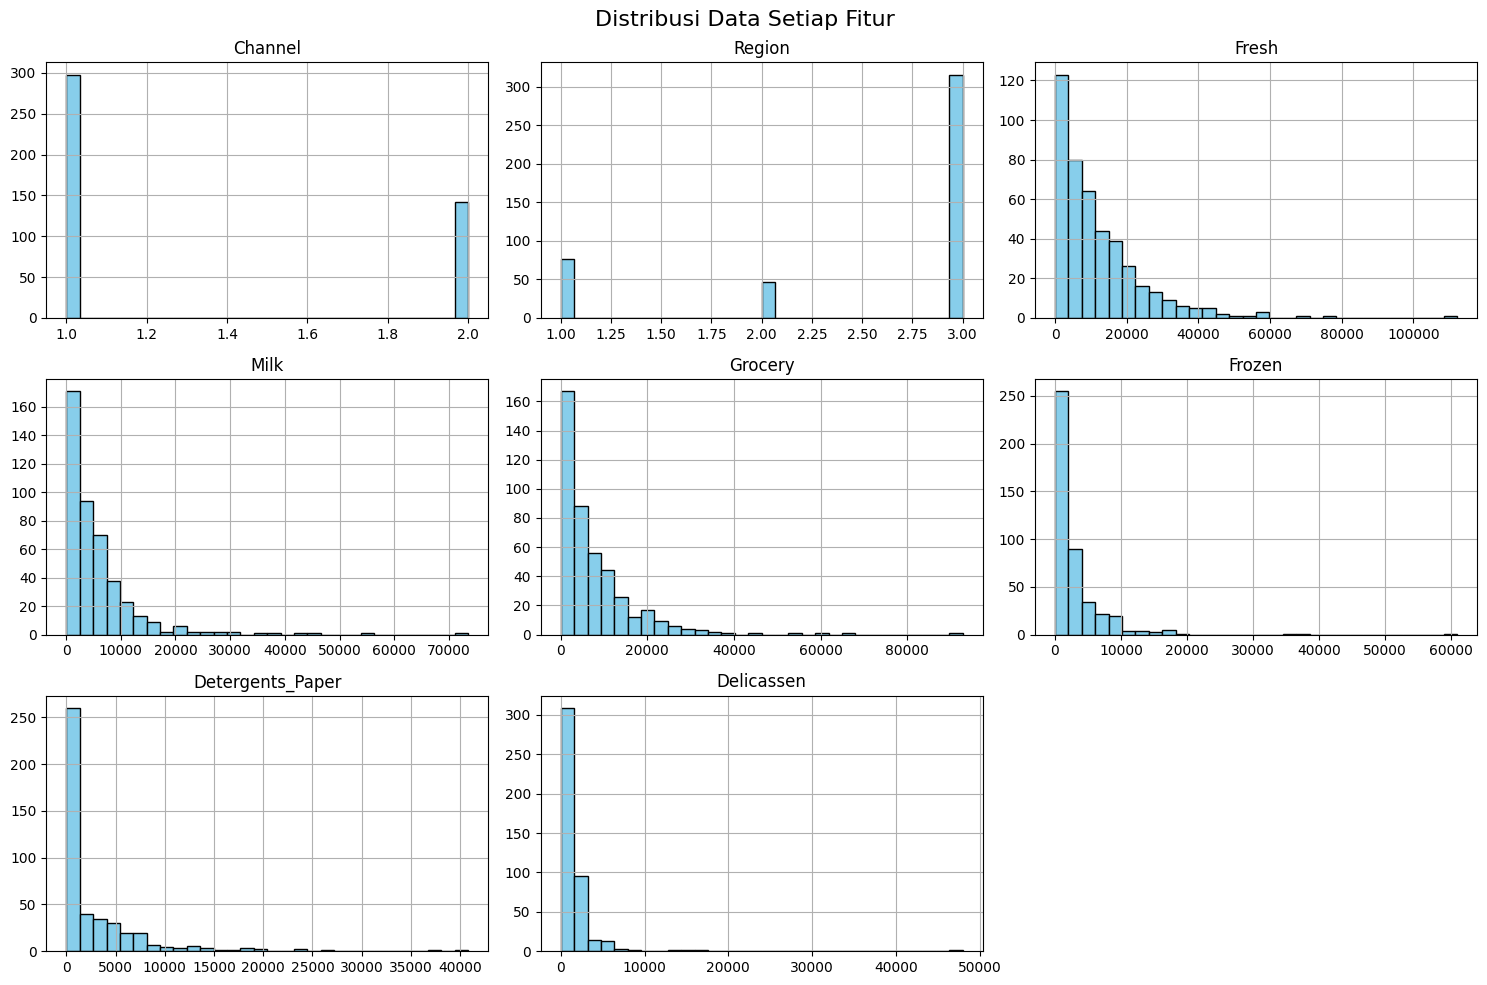

In [12]:
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Data Setiap Fitur', fontsize=16)
plt.tight_layout()
plt.show()


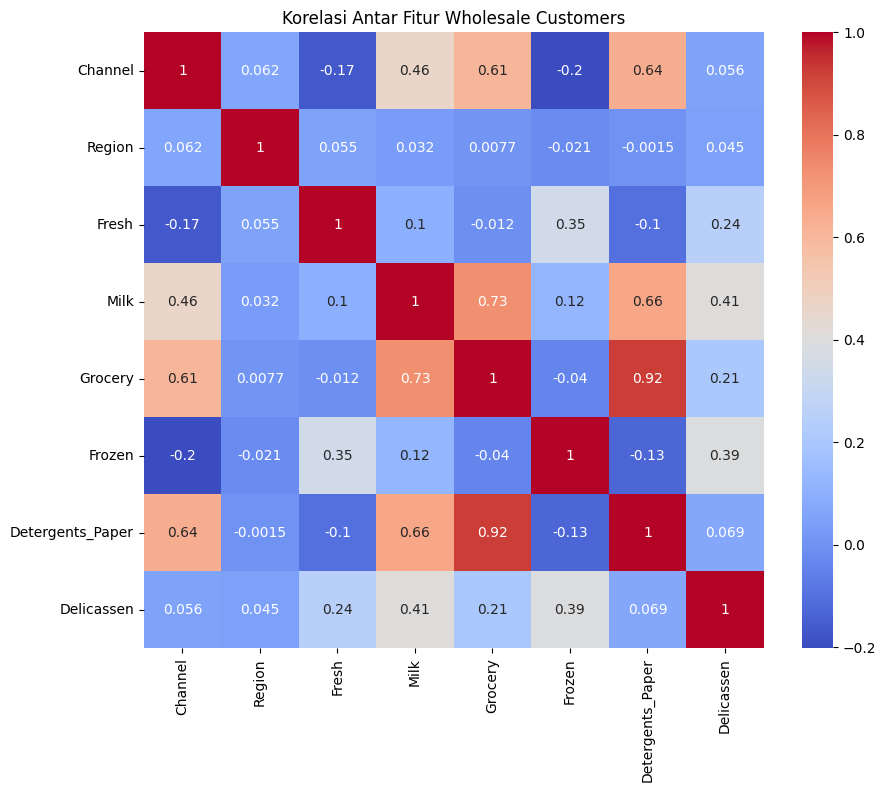

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Wholesale Customers")
plt.show()


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Konversi kembali ke DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Simpan ke DataFrame untuk visualisasi
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,0.686162,0.143443
1,0.692978,0.141117
2,0.690638,0.142219
3,-0.304239,0.270145
4,0.671296,0.148007


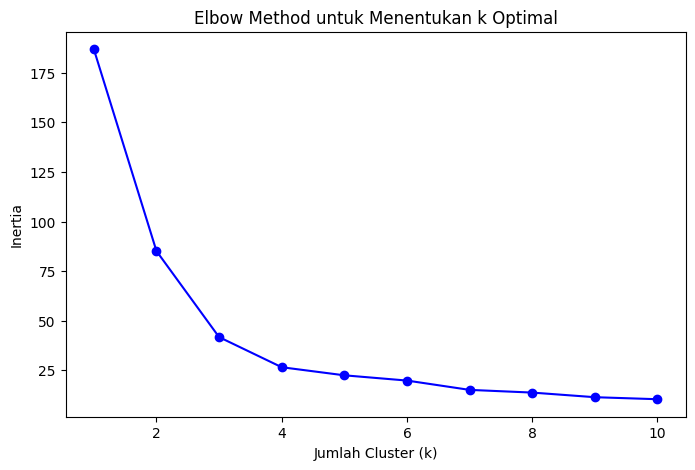

In [16]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Tambahkan hasil cluster ke data
data_scaled['Cluster'] = clusters


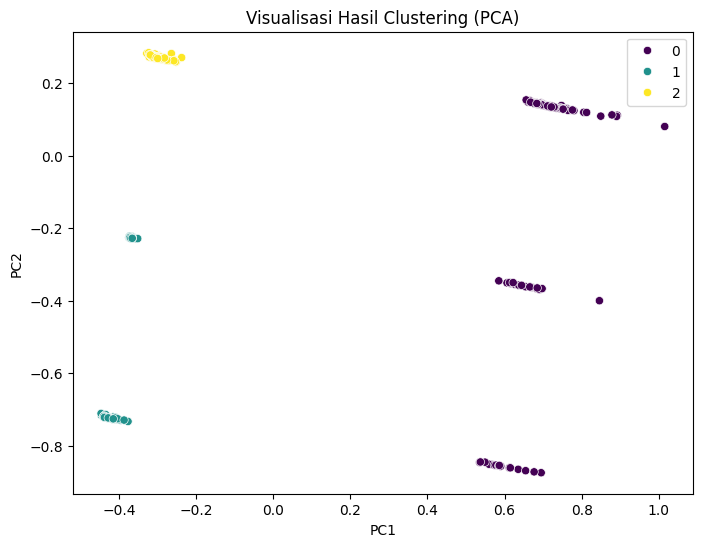

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue=clusters, palette='viridis', data=pca_df)
plt.title('Visualisasi Hasil Clustering (PCA)')
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled.drop('Cluster', axis=1), data_scaled['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.659
